# [실습2] 로이터 뉴스 데이터셋 분석

**로이터 데이터셋**

In [1]:
from tensorflow.keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2110848/2110848 [==============================] - 0s 0us/step


훈련셋 크기

In [2]:
len(train_data)

8982

테스트셋 크기

In [3]:
len(test_data)

2246

주제별 기사 수가 다르다.
훈련셋의 타깃에 사용된 값들의 빈도수를 확인하면 다음과 같다.

In [4]:
from collections import Counter

target_counter = Counter(train_labels)
target_counter

Counter({3: 3159,
         4: 1949,
         16: 444,
         19: 549,
         8: 139,
         21: 100,
         11: 390,
         1: 432,
         13: 172,
         20: 269,
         18: 66,
         25: 92,
         35: 10,
         9: 101,
         38: 19,
         10: 124,
         28: 48,
         2: 74,
         6: 48,
         12: 49,
         7: 16,
         30: 45,
         34: 50,
         15: 20,
         14: 26,
         32: 32,
         41: 30,
         40: 36,
         45: 18,
         23: 41,
         42: 13,
         26: 24,
         24: 62,
         37: 19,
         27: 15,
         31: 39,
         39: 24,
         0: 55,
         22: 15,
         33: 11,
         36: 49,
         17: 39,
         43: 21,
         29: 19,
         44: 12,
         5: 17})

가장 많이 언급된 주제는 총 3159번,
자장 적게 언급딘 주제는 총 10번 기사로 작성되었다.

In [7]:
print(f"최대 기사 수: {max(target_counter.values())}")
print(f"최소 기사 수: {min(target_counter.values())}")

최대 기사 수: 3159
최소 기사 수: 10


각 샘플은 정수들의 리스트이다.

In [8]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

각 샘플 리스트의 길이가 일반적으로 다르다.

In [9]:
len(train_data[10])

31

In [10]:
len(train_data[11])

59

각 샘플에 대한 레이블은 0부터 45까지의 정수로 표현된다.
예를 들어, 10번 기사의 주제는 3이다.

In [11]:
train_labels[10]

3

실제로 10번 기사 내용을 확인해보면 'earn'과 관련되어 있어 보인다.
데이터를 해독(decoding)하는 방법은 IMDB 데이터셋의 경우와 동일하다.

In [12]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

550378/550378 [==============================] - 0s 0us/step


10번 기사 내용은 다음과 같다.

In [13]:
decoded_newswire = " ".join([reverse_word_index.get(i - 3, "?") for i in train_data[10]])

decoded_newswire

'? period ended december 31 shr profit 11 cts vs loss 24 cts net profit 224 271 vs loss 511 349 revs 7 258 688 vs 7 200 349 reuter 3'

**데이터 전처리**

IMDB의 경우와 동일하게 길이가 10,000인 벡터로 모든 샘플을 변환한다.

In [14]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))

    for i, seq in enumerate(sequences):    # 모든 샘플에 대한 멀티-핫-인코딩
        for j in seq:
            results[i, j] = 1.
    return results

In [15]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

훈련셋의 레이블과 테스트셋의 레이블은 원-핫 인코딩한다.
케라스의 `to_categorical()` 함수가 원-핫-인코딩을 지원한다.

In [16]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [17]:
y_train[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

**모델 구성**

In [18]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

2025-06-02 10:21:17.950473: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3 Pro
2025-06-02 10:21:17.950503: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 18.00 GB
2025-06-02 10:21:17.950510: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 6.00 GB
2025-06-02 10:21:17.950542: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-06-02 10:21:17.950560: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


**모델 컴파일**

In [19]:
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

**모델 훈련**

처음 1,000개의 샘플을 검증 세트 용도로 사용한다.

In [20]:
# 검증 세트
x_val = x_train[:1000]
y_val = y_train[:1000]

# 훈련셋
partial_x_train = x_train[1000:]
partial_y_train = y_train[1000:]

훈련 방식은 이전과 동일하다.

In [21]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20


2025-06-02 10:21:29.275910: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


16/16 [==============================] - 1s 30ms/step - loss: 2.3638 - accuracy: 0.5096 - val_loss: 1.6462 - val_accuracy: 0.6260
Epoch 2/20
 7/16 [============>.................] - ETA: 0s - loss: 1.4199 - accuracy: 0.6939

2025-06-02 10:21:30.019963: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


16/16 [==============================] - 0s 11ms/step - loss: 1.3616 - accuracy: 0.7076 - val_loss: 1.2696 - val_accuracy: 0.7180
Epoch 3/20
16/16 [==============================] - 0s 11ms/step - loss: 1.0075 - accuracy: 0.7914 - val_loss: 1.0974 - val_accuracy: 0.7780
Epoch 4/20
16/16 [==============================] - 0s 11ms/step - loss: 0.7856 - accuracy: 0.8349 - val_loss: 1.0283 - val_accuracy: 0.7770
Epoch 5/20
16/16 [==============================] - 0s 11ms/step - loss: 0.6189 - accuracy: 0.8720 - val_loss: 0.9595 - val_accuracy: 0.8080
Epoch 6/20
16/16 [==============================] - 0s 11ms/step - loss: 0.4948 - accuracy: 0.9024 - val_loss: 0.9278 - val_accuracy: 0.8120
Epoch 7/20
16/16 [==============================] - 0s 11ms/step - loss: 0.3984 - accuracy: 0.9196 - val_loss: 0.9081 - val_accuracy: 0.8100
Epoch 8/20
16/16 [==============================] - 0s 11ms/step - loss: 0.3298 - accuracy: 0.9332 - val_loss: 0.9137 - val_accuracy: 0.8100
Epoch 9/20
16/16 [======

*손실값의 변화*

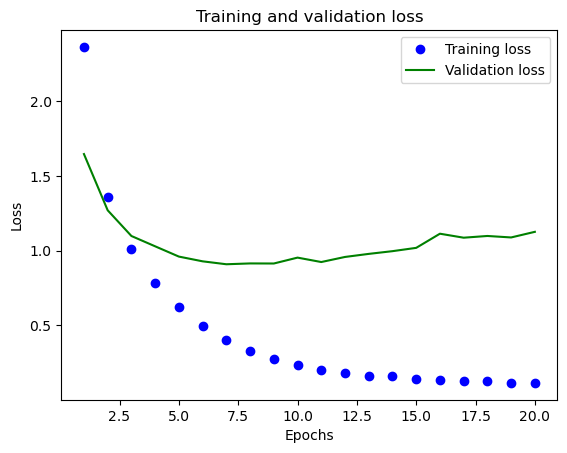

In [22]:
import matplotlib.pyplot as plt

loss = history.history["loss"]

val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "g", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

*정확도의 변화*

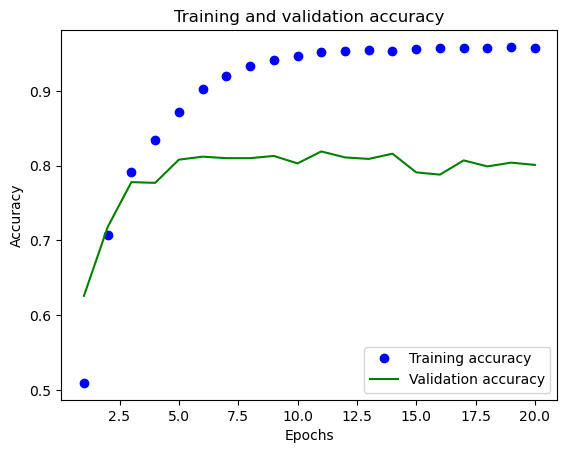

In [23]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "g", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**모델 재훈련**

에포크를 9번만 실행.

In [24]:
model = keras.Sequential([
  layers.Dense(64, activation="relu"),
  layers.Dense(64, activation="relu"),
  layers.Dense(46, activation="softmax")
])

model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

model.fit(x_train,
          y_train,
          epochs=9,
          batch_size=512)

Epoch 1/9
 6/18 [=========>....................] - ETA: 0s - loss: 3.1386 - accuracy: 0.4372

2025-06-02 10:21:45.594945: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


18/18 [==============================] - 1s 15ms/step - loss: 2.3733 - accuracy: 0.5617
Epoch 2/9
18/18 [==============================] - 0s 9ms/step - loss: 1.3016 - accuracy: 0.7300
Epoch 3/9
18/18 [==============================] - 0s 9ms/step - loss: 0.9684 - accuracy: 0.7964
Epoch 4/9
18/18 [==============================] - 0s 9ms/step - loss: 0.7599 - accuracy: 0.8454
Epoch 5/9
18/18 [==============================] - 0s 9ms/step - loss: 0.6029 - accuracy: 0.8809
Epoch 6/9
18/18 [==============================] - 0s 9ms/step - loss: 0.4806 - accuracy: 0.9049
Epoch 7/9
18/18 [==============================] - 0s 9ms/step - loss: 0.3950 - accuracy: 0.9195
Epoch 8/9
18/18 [==============================] - 0s 9ms/step - loss: 0.3236 - accuracy: 0.9330
Epoch 9/9
18/18 [==============================] - 0s 9ms/step - loss: 0.2727 - accuracy: 0.9419


훈련된 모델을 이용한 테스트셋에 대한 예측의 정확도는 80% 정도이다.

In [25]:
results = model.evaluate(x_test, y_test)

results

18/71 [======>.......................] - ETA: 0s - loss: 0.9662 - accuracy: 0.7847

2025-06-02 10:21:53.998059: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


71/71 [==============================] - 1s 8ms/step - loss: 0.9755 - accuracy: 0.7885


[0.9754558205604553, 0.7885128855705261]

80%의 정확도가 얼마나 좋은지/나쁜지를 판단하려면 무작위로 찍을 때의 정확도를 계산해봐야 한다.
아래 코드가 이를 실천하며, 20% 정도의 정확도가 나온다.
따라서 80% 정도의 정확도는 상당히 좋은 편이다.

In [26]:
import copy

# 원 데이터를 건드리지 않기 위해 사본 사용
test_labels_copy = copy.copy(test_labels)

# 무작위로 섞은 후 원 데이터의 순서와 비교
np.random.shuffle(test_labels_copy)
hits_array = test_labels == test_labels_copy

# 1 또는 0으로만 이루어졌기에 평균값을 계산하면 무작위 선택의 정확도를 계산함
hits_array.mean()

0.19367764915405164

**모델 활용**

훈련된 모델을 테스트셋에 적용한다.

In [27]:
predictions = model.predict(x_test)

71/71 [==============================] - 0s 2ms/step


2025-06-02 10:22:56.480547: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


예측값의 모두 길이가 46인 1차원 어레이다.

In [28]:
predictions[0].shape

(46,)

예측값은 46개 클래스에 들어갈 확률들로 이루어지며 합은 1이다.

In [29]:
np.sum(predictions[0])

1.0

가장 큰 확률값을 가진 인덱스가 모델이 예측하는 클래스가 된다.
예를 들어 테스트셋의 0번 샘플(로이터 기사)은 3번 레이블을 갖는다고 예측된다.

In [30]:
np.argmax(predictions[0])

3

**정보 병목**

은닉층에 사용되는 유닛은 마지막 층의 유닛보다 많아야 한다.
그렇지 않으면 정보전달 과정에 병목현상(bottleneck)이 발생할 수 있다.
아래 코드의 둘째 은닉층은 4 개의 유닛만을 사용하는데
훈련된 모델의 성능이 많이 저하된다.

In [31]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(46, activation="softmax")
])

model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Epoch 1/20


2025-06-02 10:23:08.755533: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


63/63 [==============================] - 2s 14ms/step - loss: 2.5401 - accuracy: 0.5061 - val_loss: 1.8533 - val_accuracy: 0.5650
Epoch 2/20
 8/63 [==>...........................] - ETA: 0s - loss: 1.7421 - accuracy: 0.5977

2025-06-02 10:23:10.102484: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


63/63 [==============================] - 1s 9ms/step - loss: 1.6144 - accuracy: 0.6140 - val_loss: 1.5017 - val_accuracy: 0.6490
Epoch 3/20
63/63 [==============================] - 1s 9ms/step - loss: 1.2965 - accuracy: 0.6933 - val_loss: 1.3626 - val_accuracy: 0.6930
Epoch 4/20
63/63 [==============================] - 1s 9ms/step - loss: 1.1197 - accuracy: 0.7328 - val_loss: 1.2911 - val_accuracy: 0.7040
Epoch 5/20
63/63 [==============================] - 1s 9ms/step - loss: 0.9889 - accuracy: 0.7633 - val_loss: 1.2736 - val_accuracy: 0.7130
Epoch 6/20
63/63 [==============================] - 1s 9ms/step - loss: 0.8934 - accuracy: 0.7833 - val_loss: 1.2571 - val_accuracy: 0.7230
Epoch 7/20
63/63 [==============================] - 1s 9ms/step - loss: 0.8159 - accuracy: 0.8006 - val_loss: 1.2541 - val_accuracy: 0.7250
Epoch 8/20
63/63 [==============================] - 1s 9ms/step - loss: 0.7548 - accuracy: 0.8172 - val_loss: 1.2726 - val_accuracy: 0.7200
Epoch 9/20
63/63 [=============

테스트셋에 대한 정확도가 80% 정도에서 65% 정도로 낮아진다.

In [32]:
model.evaluate(x_test, y_test)

71/71 [==============================] - 1s 7ms/step - loss: 1.8472 - accuracy: 0.7093


[1.8472427129745483, 0.709260880947113]